In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_finance as mpf
import warnings
import talib
import datetime
import stockstats
warnings.filterwarnings("ignore")
%matplotlib inline

c:\users\eggs\appdata\local\programs\python\python38\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [2]:
APPLE=pd.read_csv('APPL.csv')
APPLE.index=pd.to_datetime(APPLE.date)
APPLE2Months = APPLE.loc['2014-01-01':'2014-02-28']
APPLE.head()

,date,Open,High,Low,Close,Volume,Adjusted
date,,,,,,,
2014-01-02,2014/1/2,555.680008,557.029999,552.020004,553.129990,58671200,76.419139
2014-01-03,2014/1/3,552.860023,553.699989,540.429993,540.980019,98116900,74.740527
2014-01-06,2014/1/6,537.450005,546.800018,533.599983,543.929993,103152700,75.148089
2014-01-07,2014/1/7,544.320015,545.959999,537.919975,540.040024,79302300,74.610660
2014-01-08,2014/1/8,538.809982,545.559990,538.689980,543.460022,64632400,75.083159


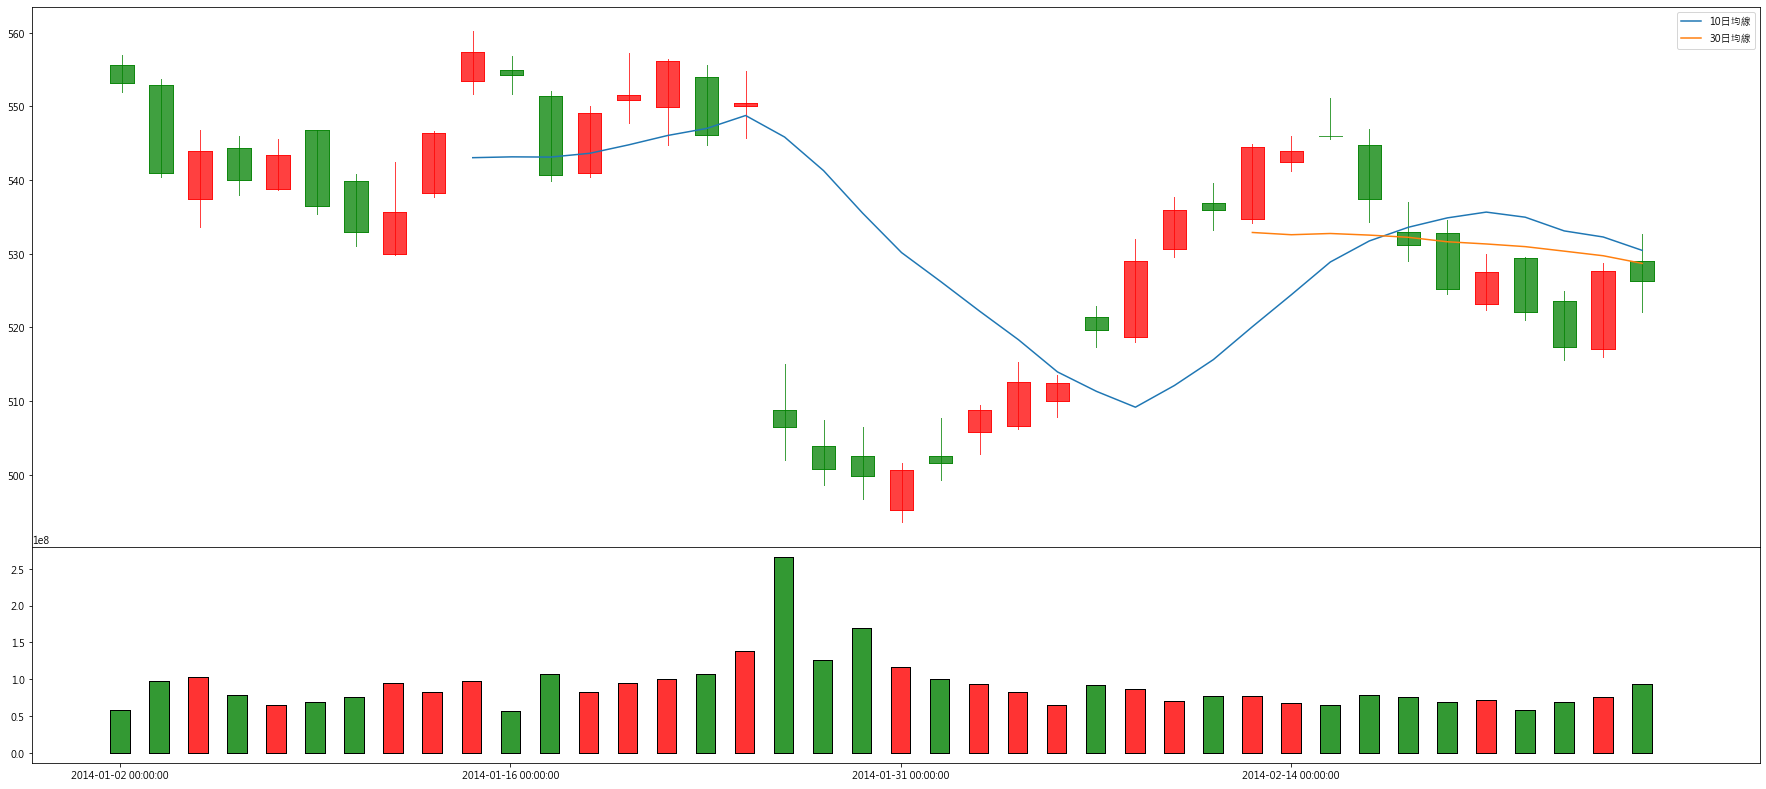

In [3]:
sma_10 = talib.SMA(np.array(APPLE2Months['Close']), 10)
sma_30 = talib.SMA(np.array(APPLE2Months['Close']), 30)

fig = plt.figure(figsize=(24, 15))
ax = fig.add_axes([0,0.2,1,0.5])
ax2 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(APPLE2Months.index), 10))
ax.set_xticklabels(APPLE2Months.index[::10])
mpf.candlestick2_ochl(ax, APPLE2Months['Open'], APPLE2Months['Close'], APPLE2Months['High'],
                      APPLE2Months['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)

plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')

mpf.volume_overlay(ax2, APPLE2Months['Open'], APPLE2Months['Close'], APPLE2Months['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(APPLE2Months.index), 10))
ax2.set_xticklabels(APPLE2Months.index[::10])

ax.legend();

In [4]:
APPLE5Months = APPLE.loc['2014-01-01':'2014-05-31']
Close = APPLE5Months.Close

In [5]:
def ewmaCal(tsprice,period=5,exponential=0.2):
    Ewma = pd.Series([np.nan]*len(tsprice),index=tsprice.index)
    Ewma[period-1]=np.mean(tsprice[:period])
    for i in range(period,len(tsprice)):
        Ewma[i]=exponential*tsprice[i]+(1-exponential)*Ewma[i-1]
    return(Ewma)

In [6]:
Ewma=ewmaCal(Close,5,0.2)
Ewma.tail()

date
2014-05-23    602.714335
2014-05-27    607.297472
2014-05-28    610.639979
2014-05-29    615.587982
2014-05-30    619.070388
dtype: float64

In [7]:
data = stockstats.StockDataFrame.retype(APPLE5Months)
print(data)


                 open        high         low       close     volume  \
date                                                                   
2014/1/2   555.680008  557.029999  552.020004  553.129990   58671200   
2014/1/3   552.860023  553.699989  540.429993  540.980019   98116900   
2014/1/6   537.450005  546.800018  533.599983  543.929993  103152700   
2014/1/7   544.320015  545.959999  537.919975  540.040024   79302300   
2014/1/8   538.809982  545.559990  538.689980  543.460022   64632400   
...               ...         ...         ...         ...        ...   
2014/5/23  607.250000  614.730011  606.470009  614.129997   58052400   
2014/5/27  615.879997  625.859985  615.630005  625.630020   87216500   
2014/5/28  626.019989  629.830009  623.779991  624.010010   78870400   
2014/5/29  627.849991  636.870010  627.769989  635.379990   94118500   
2014/5/30  637.979996  644.169991  628.900002  633.000015  141005200   

            adjusted  
date                  
2014/1/2   76.419

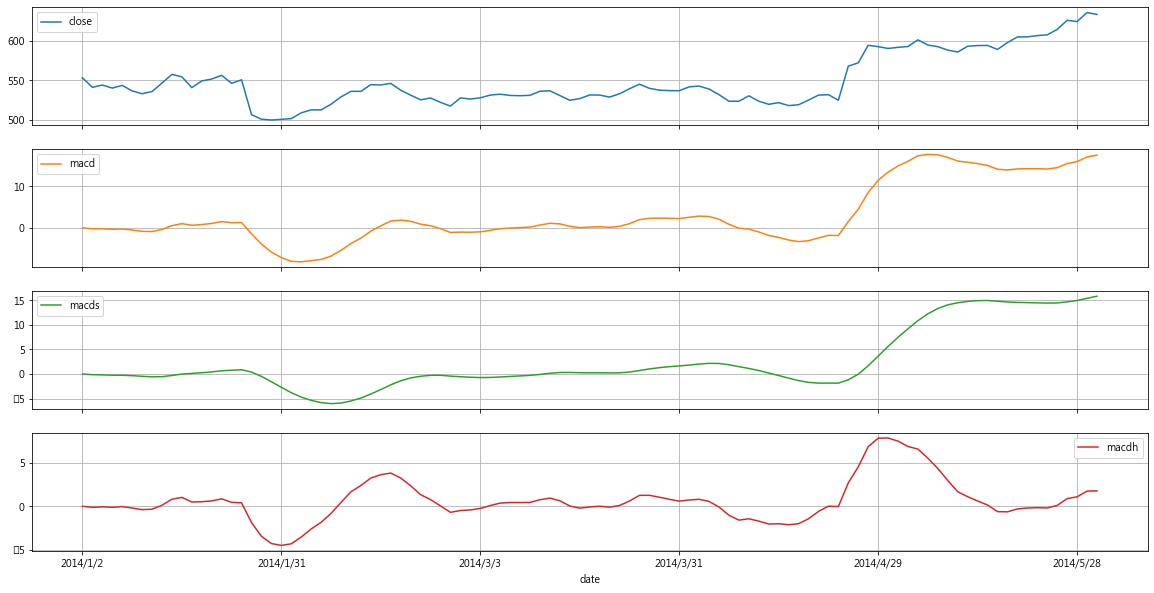

In [8]:
data[['close','macd','macds','macdh'] #
         ].plot(subplots=True,figsize=(20,10), grid=True)
plt.show()

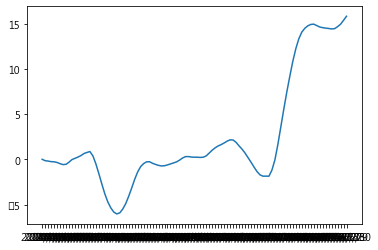

In [9]:
plt.plot(data['macds'])
plt.show()

In [10]:
DIF=ewmaCal(Close,12,2/(1+12))-ewmaCal(Close,26,2/(1+26))
DIF.tail(n=3)

date
2014-05-28    16.033653
2014-05-29    17.133428
2014-05-30    17.609966
dtype: float64

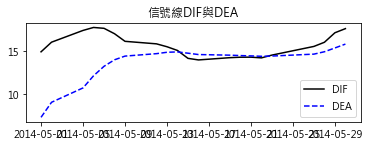

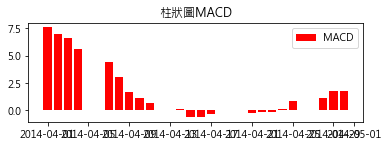

In [11]:
#MACD
DIF=ewmaCal(Close,12,2/(1+12))-ewmaCal(Close,26,2/(1+26))
DIF.tail(n=3)

DEA=ewmaCal(DIF.dropna(),9,2/(1+9))
DEA.tail()

MACD=DIF-DEA
MACD.tail(n=3)

plt.subplot(211)
plt.plot(DIF['2014-05'],\
      label="DIF",color='k')
plt.plot(DEA['2014-05'], label="DEA",\
        color='b',linestyle='dashed')
plt.title('信號線DIF與DEA')
plt.legend()
plt.show()
plt.subplot(212)
plt.bar(MACD['2014-04'].index,MACD['2014-05'],label='MACD',color='r')
plt.title('柱狀圖MACD')
plt.legend()

In [12]:
def smaCal_gene(price,k):
    priceList=[]
    n = len(price)
    for i in range(n):
        priceList.append(price[i])
        if len(priceList)==k:
            yield np.mean(priceList)
            priceList.pop(0)

In [13]:
sma10_gene=smaCal_gene(Close,10)
sma10_before = next(sma10_gene)
smaSignal=[]
for i in range(11,len(Close)):
    sma10_now = next(sma10_gene)
    if Close[i-1]<sma10_before and Close[i]>sma10_now:
        smaSignal.append(1)
    elif Close[i-1]>sma10_before and Close[i]<sma10_now:
        smaSignal.append(-1)
    else:
        smaSignal.append(0)
    sma10_before = sma10_now
    

smaSignal=pd.Series(smaSignal,index=Close.index[11:])

In [14]:
sma5_gene=smaCal_gene(Close,5)
sma30_gene=smaCal_gene(Close,30)
sma5_before = next(sma5_gene)
sma30_before = next(sma30_gene)
SLSignal=[]
for i in range(31,len(Close)):
    sma5_now = next(sma5_gene)
    sma30_now = next(sma30_gene)
    if sma5_before<sma30_before and sma5_now>sma30_now:
        SLSignal.append(1)
    elif sma5_before>sma30_before and sma5_now<sma30_now:
        SLSignal.append(-1)
    else:
        SLSignal.append(0)
    sma5_before = sma5_now
    sma30_before = sma30_now

SLSignal = pd.Series(SLSignal,index = Close.index[31:])
SLSignal[SLSignal==1]
SLSignal[SLSignal==-1]

date
2014-03-10   -1
2014-04-02   -1
2014-04-23   -1
dtype: int64

In [15]:
APPLERet=Close/Close.shift(1)-1
DIF=DIF[DEA.index]
macdSignal=pd.Series(0,index=DIF.index)
for i in range(1,len(DIF)):
    if all([DIF[i]>DEA[i]>0.0,DIF[i-1]<DEA[i-1]]):
        macdSignal[i]=1
    elif all([DIF[i]<DEA[i]<0.0,DIF[i-1]>DEA[i-1]]):
        macdSignal[i]=-1
macdSignal.tail()

macdTrade=macdSignal.shift(1)
macdRet=(APPLERet*macdTrade).dropna()
macdRet[macdRet==-0]=0
macdWinRate=len(macdRet[macdRet>0])/len(macdRet[macdRet!=0])
macdWinRate

1.0

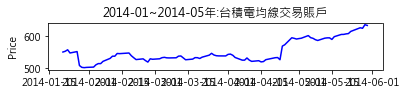

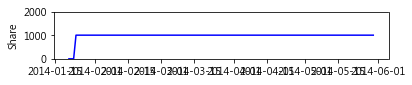

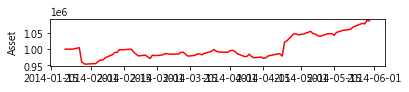

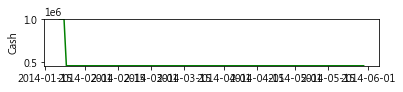

0.08693

In [16]:
AllSignal=smaSignal+SLSignal+macdSignal

for i in AllSignal.index:
    if AllSignal[i]>1:
        AllSignal[i]=1
    elif AllSignal[i]<-1:
        AllSignal[i]=-1
    else:
        AllSignal[i]=0

AllSignal[AllSignal==1]
AllSignal[AllSignal==-1]

tradSig=AllSignal.shift(1).dropna()

Close=Close[-len(tradSig):]
cash=pd.Series(0.0,index=Close.index)
share=pd.Series(0,index=Close.index)

entry=3
cash[:entry]=1000000
while entry<len(Close):
    cash[entry]=cash[entry-1]
    if all([Close[entry-1]>=Close[entry-2],\
            Close[entry-2]>=Close[entry-3],\
            AllSignal[entry-1]!=-1]):
        share[entry]=1000
        cash[entry]= cash[entry]-1000*Close[entry]
        break
    entry+=1

#根據交易信號交易股票
i=entry+1
while i<len(tradSig):
    cash[i]=cash[i-1]
    share[i]=share[i-1]
    #買入時，買入3000share
    if tradSig[i]==1:
        share[i] = share[i]+3000
        cash[i] = cash[i]-3000*Close[i]
    #賣出時，賣出1000share
    elif tradSig[i]==-1:
        share[i] = share[i]-1000
        cash[i] = cash[i]+1000*Close[i]
    i+=1

asset=cash+share*Close

asset.tail()

plt.subplot(411)
plt.title('2014-01~2014-05年:台積電均線交易賬戶')
plt.plot(Close, color='b')
plt.ylabel("Price")
plt.show()

plt.subplot(412)
plt.plot(share, color='b')
plt.ylabel("Share")
plt.ylim(0,max(share)+1000)
plt.show()

plt.subplot(413)
plt.plot(asset,label="asset",color='r')
plt.ylabel("Asset")
plt.ylim(min(asset)-5000,max(asset)+5000)
plt.show()

plt.subplot(414)
plt.plot(cash, label="cash",color='g')
plt.ylabel("Cash")
plt.ylim(min(cash)-500,max(cash)+5000)
plt.show()

TradeReturn=(asset[-1]-1000000)/1000000
TradeReturn